In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#loading hand written dataset
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

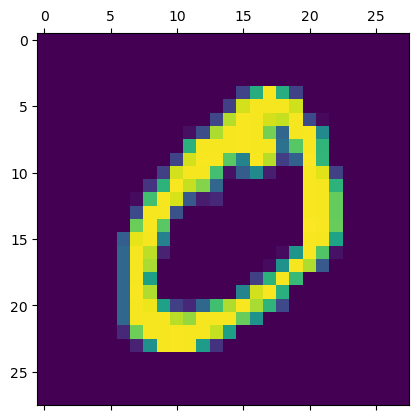

In [6]:
plt.matshow(x_train[1])

In [7]:
y_train[1]

0

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
#scaling the dataset
x_train = x_train/255
x_test = x_test/255

We have to flatten the array 
inorder to give it to neural network as a 1-D array

In [11]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_train_flattened.shape

(60000, 784)

In [12]:
x_test_flattened.shape

(10000, 784)

In [13]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

creation of neural network with input 784 elements and output 10 elements

In [32]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4759 - accuracy: 0.8741
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3042 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2728 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2665 - accuracy: 0.9258


In [15]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2676 - accuracy: 0.9257


[0.26757699251174927, 0.9257000088691711]

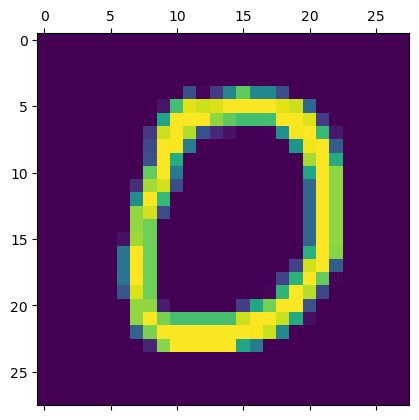

In [16]:
plt.matshow(x_test[10])

In [17]:
y_pred = model.predict(x_test_flattened)

313/313 [==============================] - 1s 3ms/step


In [18]:
y_pred[10]

array([9.9889356e-01, 3.1932868e-07, 5.2860123e-01, 7.5982936e-02,
       1.3695523e-04, 8.5434616e-01, 2.9666007e-02, 2.1338583e-05,
       7.0604241e-01, 2.7494915e-04], dtype=float32)

In [19]:
np.argmax(y_pred[10])

0

In [20]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [21]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [22]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   6,   11,  915,   15,    7,    5,   12,   11,   47,    3],
       [   4,    0,   17,  906,    0,   28,    2,   14,   33,    6],
       [   1,    1,    4,    1,  920,    0,   10,    4,   11,   30],
       [   9,    3,    3,   23,    8,  785,   12,    6,   36,    7],
       [  12,    3,    8,    0,    7,   14,  907,    2,    5,    0],
       [   1,    5,   21,    5,    7,    1,    0,  960,    5,   23],
       [   7,    8,    5,   15,    9,   21,    7,   12,  885,    5],
       [  11,    7,    1,    8,   32,    7,    0,   29,   10,  904]])>

Text(95.72222222222221, 0.5, 'Truth')

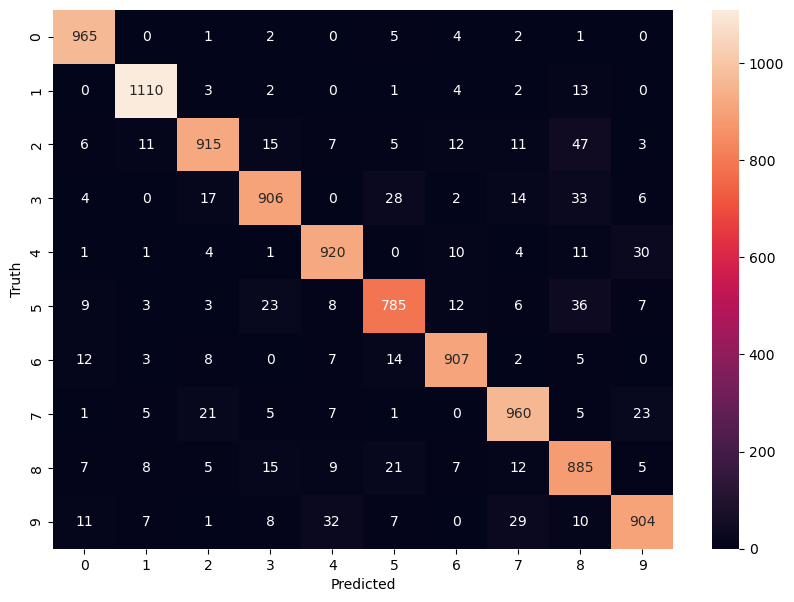

In [23]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
#creating a hidden layer
#without flattening separately 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2785 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1294 - accuracy: 0.9617
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0894 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0672 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0542 - accuracy: 0.9834


In [25]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0892 - accuracy: 0.9734


[0.08919820934534073, 0.9733999967575073]

In [26]:
y_pred_hid = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [27]:
y_pred_hidlabels = [np.argmax(i) for i in y_pred_hid]

In [28]:
cm_hid = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_hidlabels)

Text(95.72222222222221, 0.5, 'Truth')

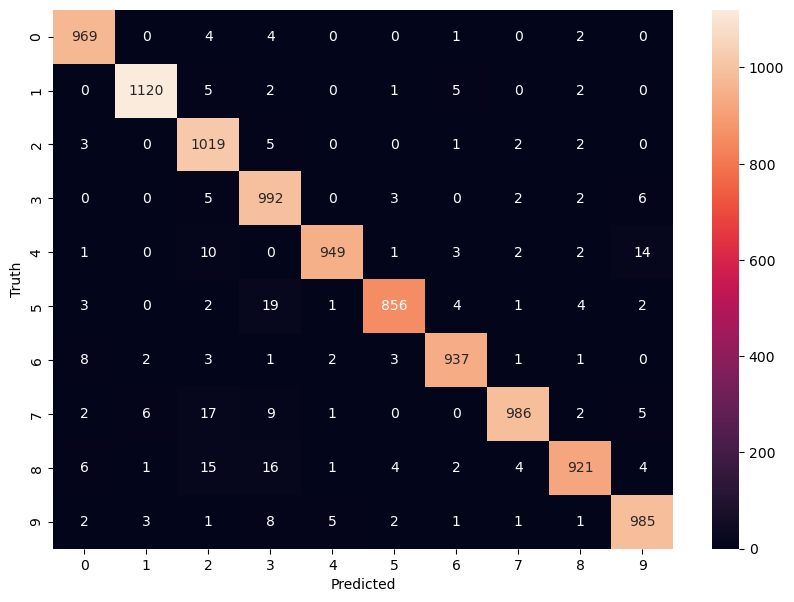

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_hid,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')

])

# we can also visualize each epoch by
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq=1)

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

model.fit(x_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6580 - accuracy: 0.8313
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3383 - accuracy: 0.9056
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2896 - accuracy: 0.9181
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2599 - accuracy: 0.9266
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2375 - accuracy: 0.9332


In [36]:
# to visualize go to command prompt
# tensorboard --logdir logs/
# or
%load_ext tensorboard
%tensorboard --logdir logs/fit